# Pendahuluan

Cakupan topik:
1. Apa saja elemen-elemen penting dari __arsitektur komputer__?
2. Bagaimana __perkembangan__ dari komputer saat ini?
3. Apa kiat-kiat mempercepat __waktu eksekusi__ dari Python code? 

## Arsitekur Komputer Dasar

Di dalam keperluan komputasi, arsitektur penting yang perlu dikenal adalah computing units (CU). CU berperan untuk melakukan operasi aritmatika dan logika sehingga CU dapat disebut juga sebagai arithmatic-logic unit (ALU). Komponen yang kedua adalah __memory unit__. Memory unit digunakan sebagai tempat penyimpanan data atau bisa dianalogikan sebagai tempat antrian data sebelum data tersebut diproses oleh CU. Memory unit memiliki dua sifat, pertama adalah bersifat __sementara (RAM)__ dan kedua adalah bersifat __permanen (storage)__. Di dalam CU terdapat memory unit yang dinamakan __cache__. CU sekarang ini terdapat minimal 3 layer cache yaitu L1, L2, dan L3. Semua komponen ini memiliki jalur komunikasi yang disebut __bus__.

## Computing Units

Di era sekarang ini, computing units terdiri dari CPU dan graphical processing units (GPU). Karakteristik utama yang menarik dari CU adalah perhitungan banyaknya operasi yang dibutuhkan dalam satu cycle dan banyaknya cycle yang dapat dikerjakan dalam satu detik. Perhitungan ini diukur oleh __instruction per cycle (IPC)__ dan __clock speed__.

![](../images/clockspeed.png)

## Memory Units

![](../images/karakteristik-memori.png)

## Communication Units

![](../images/communication%20unit.png)

## Numpy Cheatsheets

In [1]:
import numpy as np

Tipe data dasar dari Numpy adalah array. Code berikut ini membuat array dengan tipe data double precision dengan 3 elemen.

In [2]:
a = np.array([3.5, 4, 18.9], dtype='float64')
type(a)

numpy.ndarray

Parameter `dtype='float64'` menunjukan tipe data double precision yang sebenarnya tidak diperlukan karena secara default numpy array bertipe data double precision. Untuk menggunakan tipe data single precision kita dapat menggunakan parameter `dtype='float32'`. Daftar berbagai tipe data pada Numpy dapat dilihat (https://numpy.org/devdocs/user/basics.types.html). Berikut ini adalah code untuk mendeklarasikan array dengan berbagai cara

In [3]:
a_random = np.random.rand(10) # array random dengan 10 elemen
a_ones = np.ones((10,10), dtype='float') # matriks 10 x 10 dengan semua elemen bernilai 1
a_zeros = np.zeros((10, 10, 10), dtype='complex128') # tensor dengan semua elemen bernilai 0 dan tipe data complex
a_empty = np.empty(50, dtype='byte') # array yang dapat diisi oleh 'data' berukuran 50 bytes.
a_range = np.arange(50) # array berjumlah 50 elemen dan elemen-elemennya bernilai dari 0-49.

Kita juga dapat mengakses setiap elemen dari array dan mengetahui ukuran dari array-array di atas dengan code berikut

In [10]:
# ukuran array
print(a_random.shape) 
print(a_ones.shape)
print(a_zeros.shape)

# akses elemen array
print(a_random[0]) # akses elemen pertama
print(a_random[:2]) # akses dua elemen pertama
print(a_random[-2:]) # akses dua elemen terakhir
print(a_ones[:3, 2:5]) # akses kolom ke-3 sampai ke-5 di 3 baris pertama

(10,)
(10, 10)
(10, 10, 10)
0.3003821728666056
[0.30038217 0.32254245]
[0.13554162 0.64965307]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [13]:
a_ones[3,3] = 10 # ubah nilai elemen di baris 3 dan kolom 3 dengan 10
a_ones[:,4] = np.arange(10) # ubah nilai elemen di kolom 3 dengan nilai 0-9
a_ones[8] = 10 # ubah nilai baris 8 dengan 10
a_ones

array([[ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., 10.,  3.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  5.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  6.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  7.,  1.,  1.,  1.,  1.,  1.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 1.,  1.,  1.,  1.,  9.,  1.,  1.,  1.,  1.,  1.]])

Plot grafik menggunakan modul `matplotlib`.

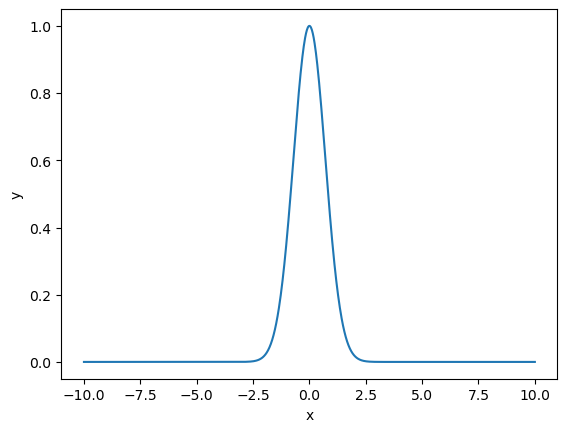

In [14]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = np.exp(-x**2)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Operasi matriks seperti perkalian matriks-matriks atau matriks-vektor di Numpy

In [19]:
A = np.array([[1,2], [1,1]])
B = np.array([[1,1], [1,1]])

C = A @ B # perkalian matriks
D = A * B # perkalian element-wise matriks

print(C)
print(D)

[[3 3]
 [2 2]]
[[1 2]
 [1 1]]


In [22]:
A = np.random.rand(1000, 1000)
b = np.random.rand(1000)
x = np.linalg.solve(A, b)
x.shape

(1000,)

In [24]:
residual = np.linalg.norm(b - A @ x) / (np.linalg.norm(A) * np.linalg.norm(x))
residual

1.014003066023323e-13

## Komputasi Paralel di Python

Di bab ini kita akan membahas berbagai macam eksekusi paralel. Kemudian kita akan mendemonstrasikan sejumlah tools untuk eksekusi paralel. Pertama kita lihat contoh sederhana berikut

In [25]:
import numpy as np

n = 1000000
a = np.random.rand(n)
b = np.random.rand(n)

c = np.empty(n)

for i in range(n):
    c[i] = a[i] + b[i]

Arsitektur **SIMD** 

![](../images/simd_sum.png)

* Process tidak mengizinkan untuk mengkases data secara langsung dari proses satu ke yang lain.
* Thread adalah aliran eksekusi di dalam suatu process. Semua thread dapat melakukan sharing memory dan bebas untuk membaca dan memanipulasi data satu dengan yang lain.

In [37]:
import numpy as np
import threading
import multiprocessing

def worker(arr1, arr2, arr3, chunk):
    
    for index in chunk:
        arr3[index] = arr1[index] + arr2[index]

nthreads = multiprocessing.cpu_count()

np.random.seed(1)

n = 1000000
a = np.random.rand(n)
b = np.random.rand(n)
c = np.empty(n)

chunks = np.array_split(range(n), nthreads) # membagi n dengan sejumlah threads

all_threads = []

for chunk in chunks:
    thread = threading.Thread(target=worker, args=(a, b, c, chunk))
    all_threads.append(thread)
    thread.start()

for thread in all_threads:
    thread.join()

In [38]:
print(nthreads)
print(chunks)
print(c)

8
[array([     0,      1,      2, ..., 124997, 124998, 124999]), array([125000, 125001, 125002, ..., 249997, 249998, 249999]), array([250000, 250001, 250002, ..., 374997, 374998, 374999]), array([375000, 375001, 375002, ..., 499997, 499998, 499999]), array([500000, 500001, 500002, ..., 624997, 624998, 624999]), array([625000, 625001, 625002, ..., 749997, 749998, 749999]), array([750000, 750001, 750002, ..., 874997, 874998, 874999]), array([875000, 875001, 875002, ..., 999997, 999998, 999999])]
[0.55531841 1.41379807 0.55724769 ... 0.73478182 0.99620445 0.66344561]


Code di atas sebenarnya tidak mengeksekusi secara paralel! Alasannya adalah karena Python memiliki feature GIL (Global Interpreter Lock). Untuk melakukan eksekusi paralel kita gunakan `Numba`.

In [33]:
import numpy as np
import numba

n = 1000000
a = np.random.rand(n)
b = np.random.rand(n)

c = np.empty(n)

@numba.njit(parallel=True)
def numba_fun(arr1, arr2, arr3):

    for index in numba.prange(n):
        arr3[index] = arr1[index] + arr2[index]

numba_fun(a,b,c)

In [34]:
print(c)

[0.88965294 1.220542   0.20014882 ... 0.9819837  0.91527884 1.20463264]
